In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
sys.path.append('/Users/lucastian/code/neuralmonkey')
sys.path.append('/Users/lucastian/code/pythonlib')

In [4]:
from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

In [9]:
# load all sessions for Pancho on 221020
MS = load_mult_session_helper(221020, 'Pancho')

Searching using this string:
/Users/lucastian/DATA/neural_preprocess/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020/Pancho-221020-133436
---
/Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020/Pancho-221020-161238
session:  0
------------------------------
Loading this neural session: 0
Loading these beh expts: None
Loading these beh sessions: None
Using this beh_trial_map_list: None
Searching using this string:
/Users/lucastian/DATA/neural_preprocess/recordings/*Pancho*/*221020*/**
Found this many paths:
2
---
/Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020/Pancho-221020-133436
---
/Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020/Pancho-221020-161238
{'filename_components_hyphened': ['Pancho', '221020', '133436'], 'basedirs': ['/Users/lucastian/DATA/neural_preprocess/recordings/Pancho', '/Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020'], 'basedi

== Trying to load events data
Loading this events (pd) locally to:  /Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020/Pancho-221020-161238/events_photodiode.pkl
== Done
** MINIMAL_LOADING, therefore loading previuosly cached data
Generated self._MapperTrialcode2TrialToTrial!
Extracted into self.Dat[epoch_orig]
=== CLEANING UP self.Dat (_cleanup_reloading_saved_state) ===== 
0 _behclass_alignsim_compute
Running D._behclass_tokens_extract_datsegs
0 _behclass_tokens_extract_datsegs
stored in self.Dat[BehClass]
Extracted successfully for session:  1
Generated index mappers!


In [10]:
# get a summary of e.g. units per brain region
MS.print_summary_sessions()

=== N trials per session
601
170
=== N units per session

====== SESSION NUM:  0
M1_m  :  30
M1_l  :  28
PMv_l  :  30
PMv_m  :  28
PMd_p  :  28
PMd_a  :  30
dlPFC_p  :  32
dlPFC_a  :  32
vlPFC_p  :  30
vlPFC_a  :  32
FP_p  :  30
FP_a  :  31
SMA_p  :  30
SMA_a  :  32
preSMA_p  :  32
preSMA_a  :  31
 ------- 
TOTAL:  486
MIN:  28
MAX:  32
MEAN:  30.375
--------
BAD SITES (n sites)
sites_garbage 26
sites_low_fr 220
Total (accounting for overlap):  26
------
Summary for each overall region
region, nunits, --, min(sitenum), max(sitenum)
M1_m 30 ---- 1 32
M1_l 28 ---- 33 64
PMv_l 30 ---- 65 96
PMv_m 28 ---- 97 127
PMd_p 28 ---- 129 160
PMd_a 30 ---- 161 192
dlPFC_p 32 ---- 193 224
dlPFC_a 32 ---- 225 256
vlPFC_p 30 ---- 257 288
vlPFC_a 32 ---- 289 320
FP_p 30 ---- 321 352
FP_a 31 ---- 354 384
SMA_p 30 ---- 385 416
SMA_a 32 ---- 417 448
preSMA_p 32 ---- 449 480
preSMA_a 31 ---- 481 512

====== SESSION NUM:  1
M1_m  :  30
M1_l  :  28
PMv_l  :  30
PMv_m  :  28
PMd_p  :  28
PMd_a  :  30
dlPFC_p 

In [12]:
# get session 1
sn = MS.SessionsList[1]

In [13]:
# from this session, get list of sites (just a list of numbers)
sites = sn.sitegetter_all()

In [ ]:
# get all sites for a given brain region (list of numbers that ranges from 1:512)
sn.sitegetter_map_region_to_sites('vlPFC_a')

In [14]:
# get list of good (i.e. attempted) trials in this session (just a list of numbers)
trials = sn.get_trials_list(True) #only_if_ml2_fixation_success=True

In [15]:
# get spiketimes and other metadat for a given [SITE, CHANNEL]
sn.datall_slice_single_bysite(212,62)

/Users/lucastian/DATA/neural_preprocess/recordings/Pancho/221020/Pancho-221020-161238/cached/datall_site_trial/datslice_trial62_site212.pkl
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/lucastian/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/c2/3657_nnx4_94p2gh1n3mqsym0000gn/T/ipykernel_49447/1972872520.py", line 2, in <module>
    sn.datall_slice_single_bysite(212,62)
  File "/Users/lucastian/code/neuralmonkey/neuralmonkey/classes/session.py", line 2259, in datall_slice_single_bysite
    return self.datall_slice_single(rs, chan, trial0, return_index)
  File "/Users/lucastian/code/neuralmonkey/neuralmonkey/classes/session.py", line 2277, in datall_slice_single
    dat = self._savelocalcached_loadextract_datslice(trial0, site)
  File "/Users/lucastian/code/neuralmonkey/neuralmonkey/classes/session.py", line 1457, in _savelocalcached_loadextract_datslice
    raise err
  File "/Users/lucastian/code/neuralmonkey/neuralmonkey/classes/session.py", line 1454, in _savelocalcached_loade

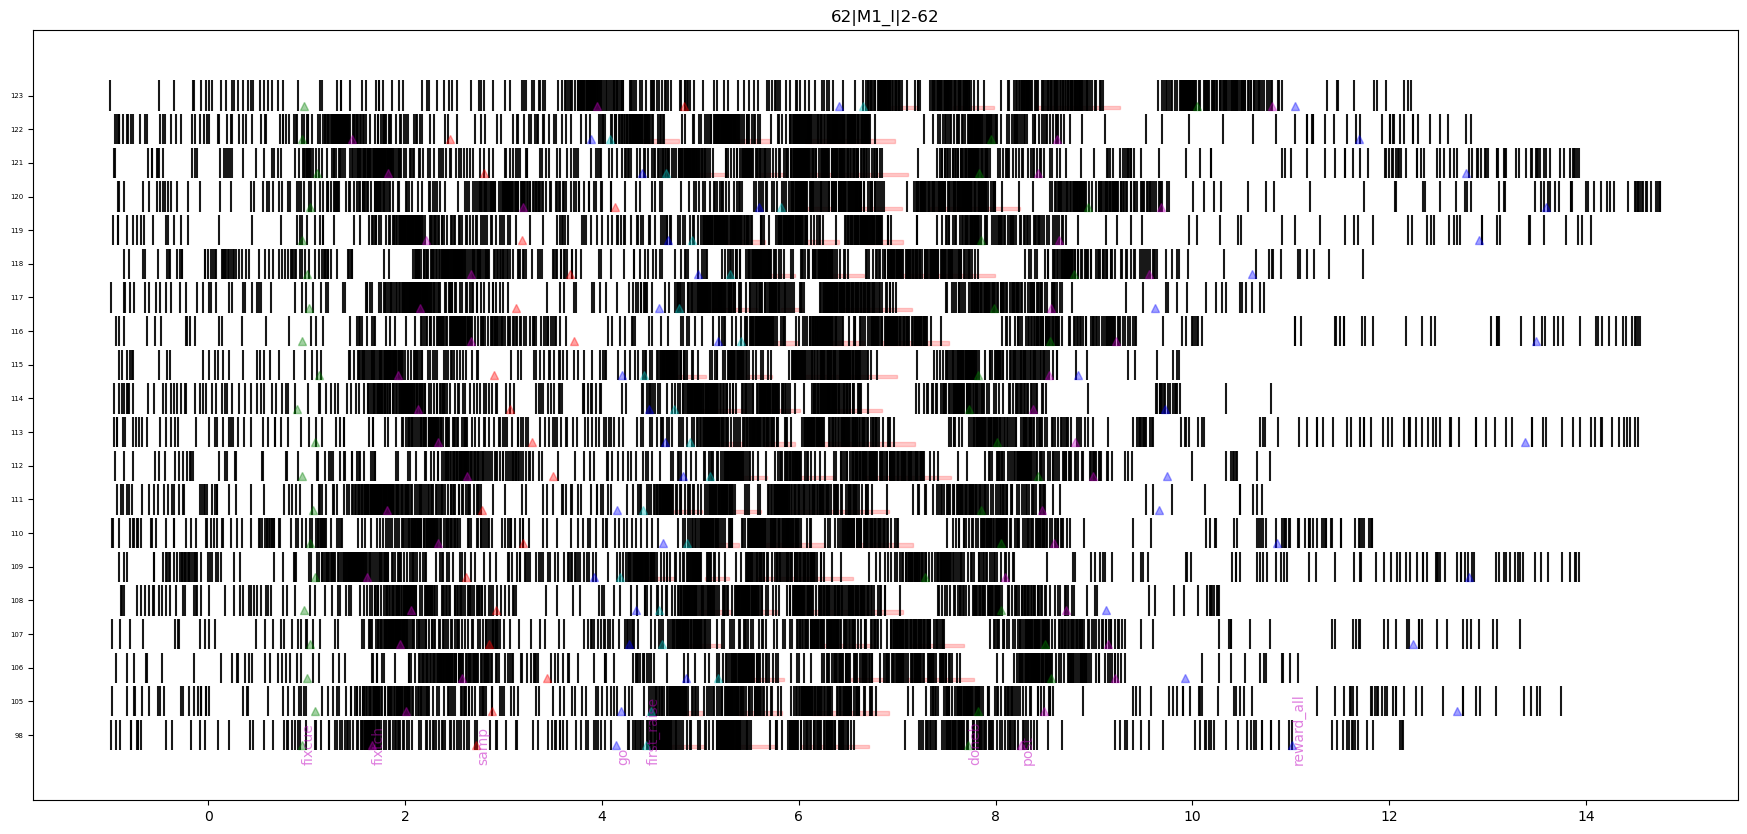

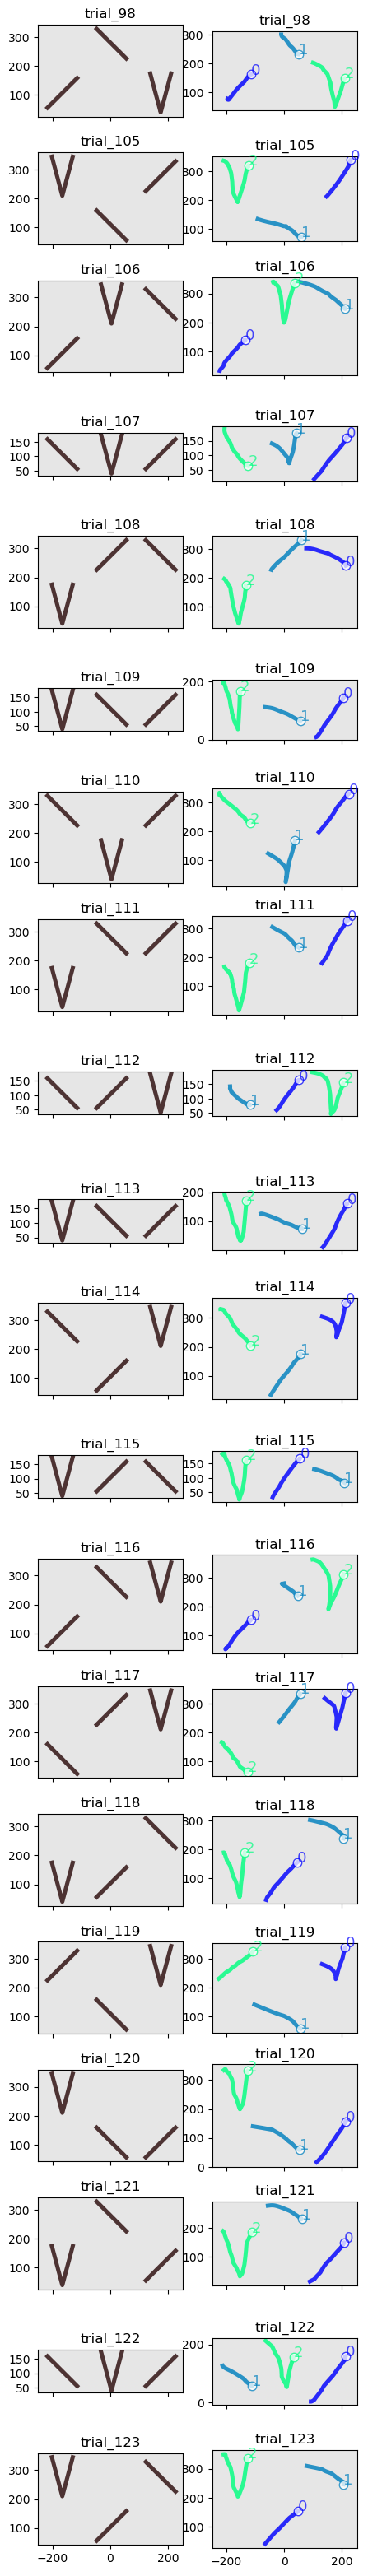

In [18]:
# plot multiple trials for a given site
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 62);

In [ ]:
# plot multiple trials for a given site, and align to a task event (e.g. go, doneb)
sn.plotwrapper_raster_multrials_onesite(trials[80: 100], 298, alignto="go");

In [ ]:
# plot one trial for MULTIPLE sites (also makes plots for photodiodes, eyetracking etc.)
sn.plotwrapper_raster_oneetrial_multsites(110,sites)

In [ ]:
# x-coordinate of eye, but in terms of voltage not screen
# (will have to scale/rotate to get screen coordinates)
times_x, vals_x, fs_x = sn.extract_data_tank_streams("eyex", 110, ploton=True)

In [ ]:
#%matplotlib notebook
times_y, vals_y, fs_y = sn.extract_data_tank_streams("eyey", 110, ploton=True)

In [ ]:
# EYE VISUALIZATION 1: dots
plt.figure()
plt.scatter(vals_x, vals_y)

In [ ]:
# EYE VISUALIZATION 2: heatmap (hex)
plt.figure()
plt.hexbin(vals_x, vals_y,cmap="cividis")

In [ ]:
# EYE VISUALIZATION 3: heatmap (hist2d)
plt.figure()
plt.hist2d(vals_x,vals_y,bins=40);

In [ ]:
# ???
fig, ax = plt.subplots(1,1)
sn.plotwrapper_smoothed_multtrials_multsites_timewindow(sites[:1], trials[:20], ax=ax)

In [ ]:
# aligning neural trial # to behavior trial # (as there is usually an offset)
t = trials[90]
idx = sn.datasetbeh_trial_to_datidx(t)
print(t, idx)
sn.Datasetbeh.Dat.iloc[idx]

In [ ]:
# --- make histogram of diffs, is it bimodal? (if so, split as saccades/fixations, otherwise )
d = np.diff(vals_x); 
d = d[np.abs(d) < 1];
t = np.arange(len(d));
plt.figure()
plt.plot(t,d)
#d2 = np.diff(d)
#d2_clean = d2[np.abs(d2) < 1]
#plt.hist(d2_clean,bins=100,log=True);

In [ ]:
##func(ax, eye_x_values, eye_y_values) --> ax (with drawing on top).
#import matplotlib.pyplot as plt
#fig, axes = plt.subplots(2,2)
#ax = axes.flatten()[3]
#ax.plot(1,1,'ok')

In [ ]:
# get affine-transformed data (e.g. relative to screen)
x_aff = sn.beh_extract_eye_good(113)[1][:,0]
y_aff = sn.beh_extract_eye_good(113)[1][:,1]

# SMOOTH DATA
from pythonlib.pythonlib.tools.timeseriestools import smoothDat
x_aff_sm = smoothDat(x_aff, window_len=10)
y_aff_sm = smoothDat(y_aff, window_len=10)

In [ ]:
strk = sn.strokes_extract(113)

# get time of first element in each array, for "stroke onset", and then subsample data for eyetracking on this
onset = strk[0][0,2]
offset = strk[-1][-1,2]

In [ ]:
times = sn.beh_extract_eye_good(113)[0]
inds = (times>onset) & (times<offset)

plt.figure()
plt.scatter(x_aff_sm[inds], y_aff_sm[inds],c=range(sum(inds)))

In [ ]:
# yarbus
plt.figure()
plt.scatter(x_aff_sm, y_aff_sm,c=range(len(x_aff_sm)))

In [ ]:
fig, ax = plt.subplots(1,1)
sn.plot_final_drawing(ax, 113)

In [ ]:
# heatmap
plt.figure()
plt.hist2d(x_aff_sm,y_aff_sm,bins=100);

In [ ]:
# x-plot
plt.figure()
times = range(0,len(x_aff_sm))
plt.plot(times,x_aff_sm)

In [ ]:
# y-plot
plt.figure()
plt.plot(times,y_aff_sm)

### Snippets

Collects data aligned to instances of a given event. Can then use the Snippets methods to do many things, plotting, analysis, etc.

In [ ]:
sn.datasetbeh_trial_to_trialcode(50)

In [ ]:
sn.datasetbeh_trialcode_to_trial(trialcode)


In [ ]:
from neuralmonkey.classes.snippets import Snippets, extraction_helper


In [ ]:
# Pick out a single session
sn = MS.SessionsList[0]


In [ ]:
# Turn on debug mode, this prunes sites and trials, so below runs faster
DEBUG = True
sn._DEBUG_PRUNE_SITES = DEBUG
sn._DEBUG_PRUNE_TRIALS = DEBUG


In [ ]:
# ****** FOR KEDAR: you would want to modify list_events to something like this:
list_events = ["saccon", "saccoff"]



In [ ]:
# Main code for extracting Snippets (SP)

# == MODIFY THESE:
list_events = ["go", "doneb"] # each event defines a snippet
list_pre_dur = [-0.5]
list_post_dur = [0.5]

# == IGNORE THESE:
which_level = "flex"
list_features_extraction = []
list_features_get_conjunction = []
trials_prune_just_those_including_events=False

SP = Snippets(sn,
    which_level,
    list_events,
    list_features_extraction,
    list_features_get_conjunction,
    list_pre_dur,
    list_post_dur,
    strokes_only_keep_single=False,
    tasks_only_keep_these=None,
    prune_feature_levels_min_n_trials=None,
    dataset_pruned_for_trial_analysis=None,
    trials_prune_just_those_including_events=trials_prune_just_those_including_events,
    fr_which_version='sqrt',
    NEW_VERSION=True,
    SKIP_DATA_EXTRACTION=False
             )


In [ ]:
# Inspect the data. 
# Each row represents a single combination of:
# (trial, chan, event). To see that, inspect the output of 

display(SP.DfScalar)

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(SP.DfScalar, ["trialcode", "chan", "event_aligned"])


##### Plotting functions for Snippets

In [ ]:
# Rasters and smoothed FR, split by event
chan = 2
SP.plotgood_rasters_smfr_each_level_combined(chan, var="event")

In [ ]:
# you can further split data based on conjucntions of another set of variables.

# For example, let's make that same plot, but split subplots by epoch.
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch"]) # plot


In [ ]:
# We can plot the same data, but flipping which variable
SP.plotgood_rasters_smfr_each_level_combined(chan, var="epoch", vars_others=["event"]) # plot


In [ ]:
# You can even use conjucjtions of mltiple variables for splitting suybplots
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP
SP.datasetbeh_append_column("block", sn.Datasetbeh) # assign epoch to SP

SP.plotgood_rasters_smfr_each_level_combined(chan, var="event", vars_others=["epoch", "block"]) # plot

# Now each subplot is a specific conjucntion of the variables epoch and block.

##### == SCRATCH NOTES - IGNORE

In [ ]:
# trials = sn.get_trials_list(True)[:5]
# sites = sn.sitegetter_all()[:5]
# list_events = ["go", "doneb", "reward_all"]
# sn.snippets_extract_by_event_flexible(sites, trials, list_events)

# PA = sn.smoothedfr_extract_timewindow_bytimes(trials, 
#                                         times=[0.5 for _ in range(5)],
#                                         sites = sites)

##### Computing modulation of activity by certain variables

In [ ]:
# Run this. You need to first reextract SP, but NOT in DEBUG mode. Or else there is not enough
# data to compute modulation.

SP.modulationgood_compute_wrapper("epoch")